## TF-IDF(Term Frequency-Inverse Document Frequency)
- https://wikidocs.net/31698
- DTM 내에 있는 각 단어에 대한 중요도를 계산할 수 있는 TF-IDF 가중치
- 기존의 DTM을 사용하는 것보다 보다 많은 정보를 고려하여 문서들을 비교 가능
- TF-IDF가 DTM보다 항상 좋은 성능을 보장하는 것은 아님. 하지만 많은 경우 DTM보다 더 좋은 성능

### TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)
- TF-IDF: 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법
    - DTM을 만든 후, TF-IDF 가중치 부여
- 주로 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 활용

- TF-IDF는 TF와 IDF를 곱한 값을 의미
    - 문서를 d, 단어를 t, 문서의 총 개수를 n

#### tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수
- TF는 앞에서 배운 DTM의 예제에서 각 단어들이 가진 값들
- DTM이 각 문서에서의 각 단어의 등장 빈도를 나타내는 값이었기 때문

#### df(t) : 특정 단어 t가 등장한 문서의 수
- 특정 단어가 각 문서, 또는 문서들에서 몇 번 등장했는지는 관심가지지 않으며 오직 특정 단어 t가 등장한 문서의 수에만 관심을 가짐
- ex. 앞서 배운 DTM에서 바나나는 문서2와 문서3에서 등장했음. 이 경우 바나나의 df는 2. 문서 3에서 바나나가 2번 등장했지만 이는 중요하지 않음

#### idf(d, t) : df(t)에 반비례하는 수
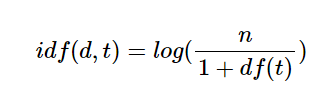
- IDF는 DF의 역수를 취하는 것
- log 사용하는 이유
    - log를 사용하지 않는 경우, 총 문서의 수 n이 커질 수록, IDF의 값은 기하급수적으로 커지게 됨
    - 불용어 등과 같이 자주 쓰이는 단어들은 비교적 자주 쓰이지 않는 단어들보다 최소 수십 배 자주 등장
- 분모에 1을 더해주는 이유
    - 특정 단어가 전체 문서에서 등장하지 않을 경우에 분모가 0이 되는 상황을 방지

- TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단
- 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단
- TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것
    - ex. the나 a와 같이 불용어의 경우, 모든 문서에 자주 등장, 자연스럽게 불용어의 TD-IDF의 값은 다른 단어의 TF-IDF에 비해서 낮아지게 됨

- 예시
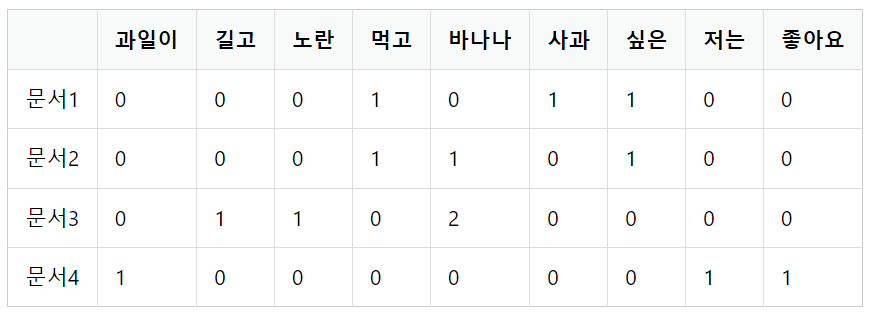
    - 기존 DTM에서 IDF를 구합니다.
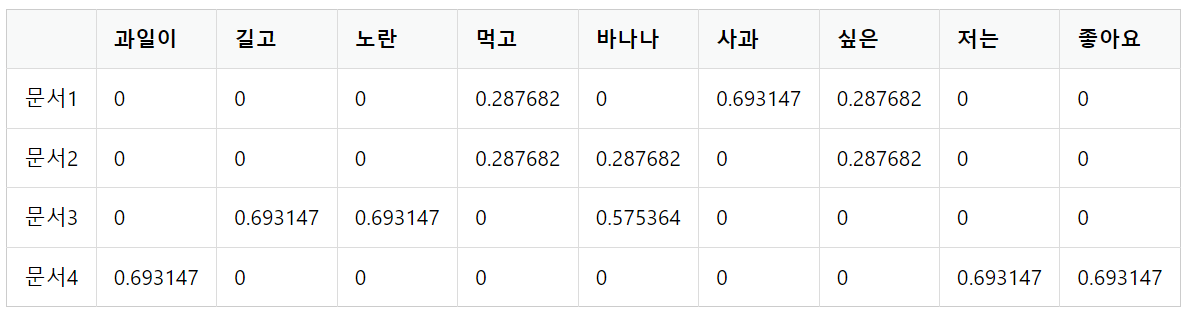
    - IDF값을 구해준 뒤, 기존 DTM값에 곱해주면 TF-IDF값이 나옵니다. 
    - 문서2와 3에서의 바나나의 TF-IDF 가중치가 다름. 문서3에서는 바나나를 두 번 언급했기 때문에 문서3에서의 바나나를 더욱 중요한 단어라고 판단

### 파이썬으로 TF-IDF 직접 구현하기

In [1]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [2]:
vocab

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [3]:
# 총 문서의 수
N = len(docs) 

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t,d)* idf(t)

In [7]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [8]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [9]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_


,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


- 사실 실제 TF-IDF 구현을 제공하고 있는 많은 머신 러닝 패키지들은 패키지마다 식이 조금씩 상이
- 기본적인 식을 바탕으로 한 구현에는 몇 가지 문제점이 존재
    - IDF값이 0이 될수가 있음.
    - ex. n=4, df(t)=3 -> idf(d,t)=0
    - IDF값이 0이라면 더 이상 가중치 역할 수행 불가
    - 사이킷런의 TF-IDF 구현체 또한 조정된 식을 사용 중임

### 사이킷런을 이용한 DTM과 TF-IDF 실습
- 사이킷런을 통해 DTM과 TF-IDF 만들기
- DTM은 CountVectorizer 사용
- 사이킷런은 TF-IDF를 자동 계산해주는 TfidfVectorizer를 제공
- IDF의 로그항의 분자에 1을 더해주며, 로그항에 1을 더해주고, TF-IDF에 L2 정규화라는 방법으로 값을 조정하는 등의 차이로 TF-IDF가 가진 의도는 여전히 그대로 갖고 있다고 함..

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
